## Week 1: Discrete time Markov chain

* Simulating symmetric 1D random walk
* Simulating a Markov chain from its transition matrix

In [70]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Example 1: Symmetric Random Walk

Initialization

In [71]:
nsteps = 1000 #number of steps to simulate
x = np.zeros(nsteps)
x[0] = 0 #initial state

Simulation

In [72]:
for t in range(nsteps - 1):
    if np.random.rand() <= 0.5:
        x[t + 1] = x[t] + 1 
    else:
        x[t + 1] = x[t] - 1

Plotting the outcome of the simulation

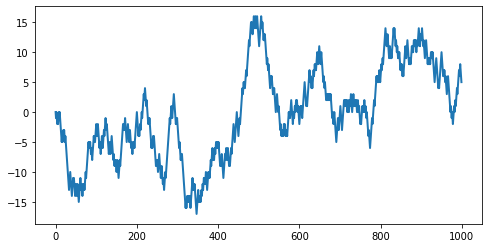

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(x, lw=2)

To simulate multiple realizations of the walk we just need to run the simulation above multiple times and store the results

Initialize each realization

In [74]:
nrealizations = 10 #number of realizations to simulate

x = np.zeros((nsteps, nrealizations))
x[0] = np.zeros(nrealizations) #initial state

Simulate each realization

In [75]:
for r in range(nrealizations):
    for t in range(nsteps - 1):
        if np.random.rand() <= 0.5:
            x[t + 1, r] = x[t, r] + 1 
        else:
            x[t + 1, r] = x[t, r] - 1

Plotting each realization

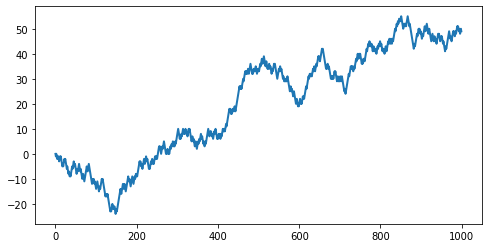

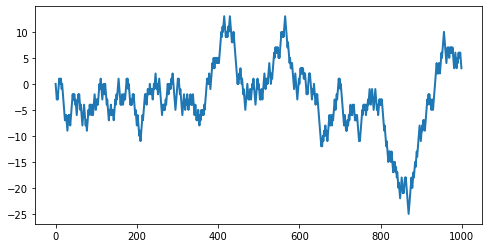

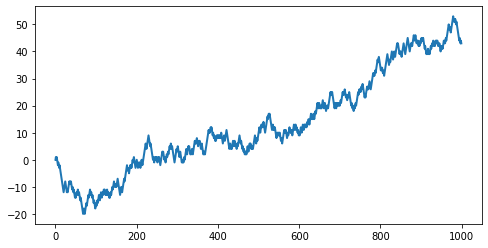

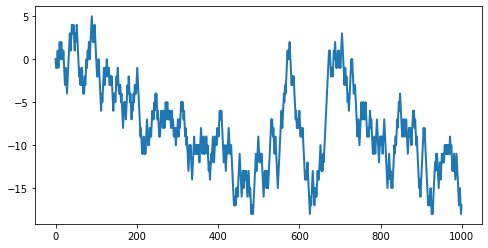

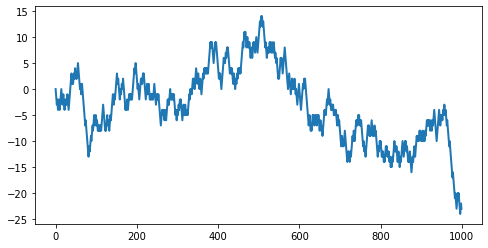

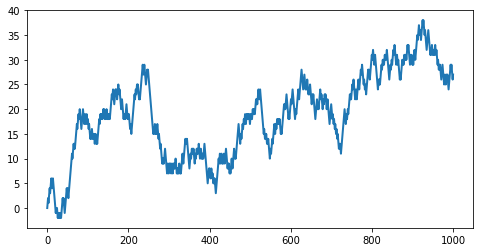

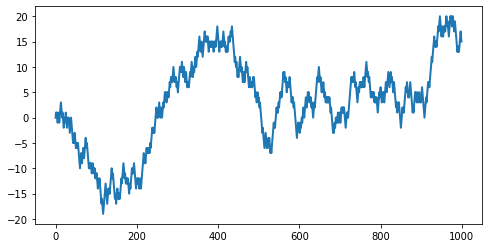

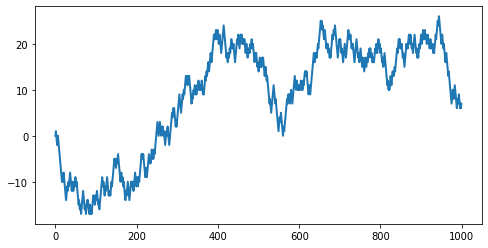

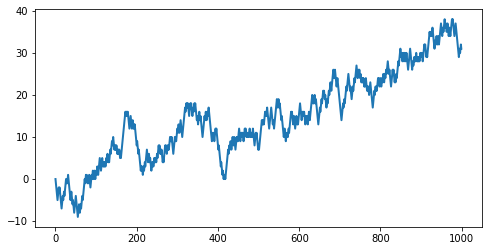

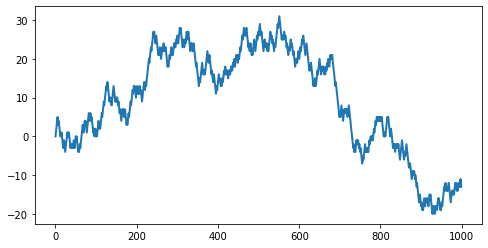

In [76]:
for r in range(nrealizations):
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    ax.plot(x[:, r], lw=2)
    plt.show()

### Example 2: Simulating a Markov chain using the transition matrix

The following class allows to define a Markov Chain from a transition matrix and its states, and simulate the chain (from https://github.com/PacktPublishing/Hands-On-Markov-Models-with-Python)

In [77]:
class MarkovChain(object):
    def __init__(self, transition_matrix, states):
        """
        Initialize the MarkovChain instance.
 
        Parameters
        ----------
        transition_matrix: 2-D array
            A 2-D array representing the probabilities of change of 
            state in the Markov Chain.
 
        states: 1-D array 
            An array representing the states of the Markov Chain. It
            needs to be in the same order as transition_matrix.
        """
        self.transition_matrix = np.atleast_2d(transition_matrix)
        self.states = states
        self.index_dict = {self.states[index]: index for index in 
                           range(len(self.states))}
        self.state_dict = {index: self.states[index] for index in
                           range(len(self.states))}
 
    def next_state(self, current_state):
        """
        Returns the state of the random variable at the next time 
        instance.
 
        Parameters
        ----------
        current_state: str
            The current state of the system.
        """
        return np.random.choice(
         self.states, 
         p=self.transition_matrix[self.index_dict[current_state], :]
        )
 
    def generate_states(self, current_state, no=10):
        """
        Generates the next states of the system.
 
        Parameters
        ----------
        current_state: str
            The state of the current random variable.
 
        no: int
            The number of future states to generate.
        """
        future_states = []
        for i in range(no):
            next_state = self.next_state(current_state)
            future_states.append(next_state)
            current_state = next_state
        return future_states

The next block allows to input a transition matrix, initialize the Markov chain and simulate a realization

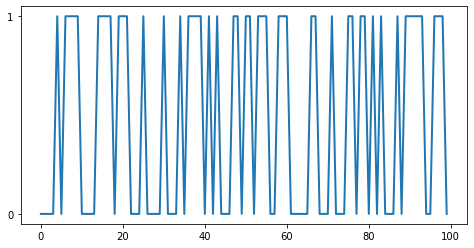

In [78]:
transition_matrix = [[0.5, 0.5], [0.5,  0.5]]# Input your transition matrix here
example_chain = MarkovChain(transition_matrix=transition_matrix, states=['0', '1']) # Name your states here
simulation= example_chain.generate_states(current_state='0', no=100) #Simulate the chain (specify the number of states here)
arr = np.array(simulation)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(arr, lw=2)

To simulate multiple realizations of the chain we defined above, we simply call the `generate_states()` method multiple times

Initialize an array for storing all of our simulation results

In [79]:
nrealizations = 10
nsteps = 100

arr = np.zeros((nsteps, nrealizations))

Run `generate_states()` once for each realization and store the result

In [80]:
for r in range(nrealizations):
    simulation = example_chain.generate_states(current_state='0', no=nsteps)
    arr[:, r] = np.array(simulation)

Plot the realizations

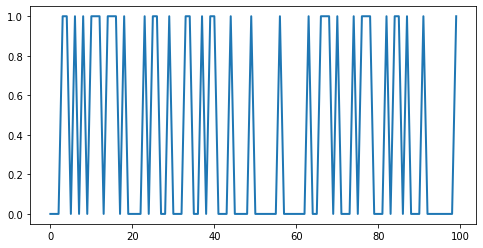

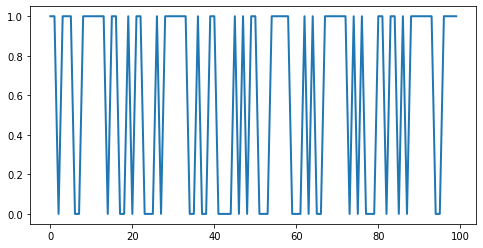

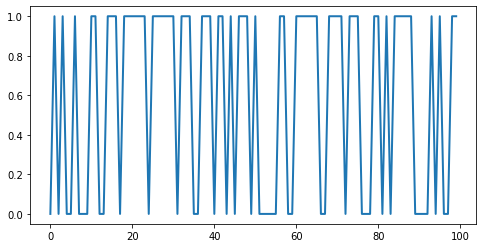

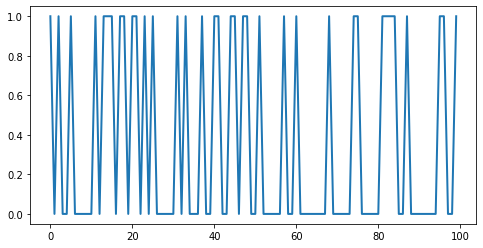

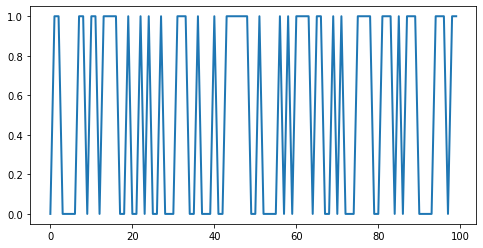

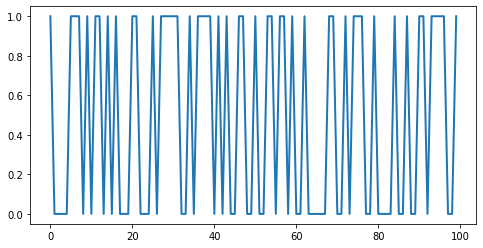

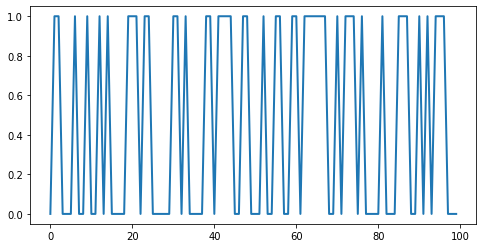

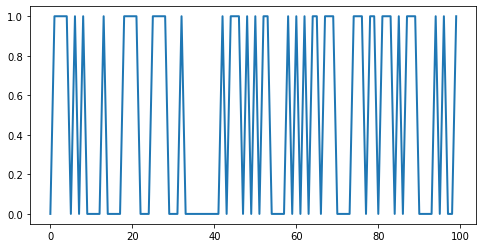

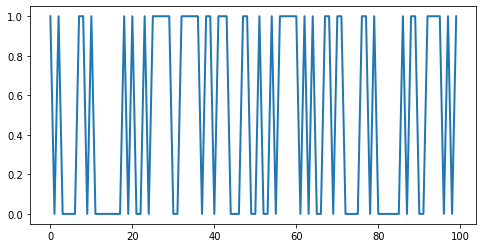

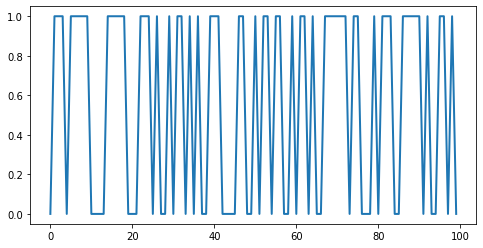

In [81]:
for r in range(nrealizations):
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    ax.plot(arr[:, r], lw=2)
    plt.show()

Compute the empirical distribution over the states at some time step `N` using the following function

In [82]:
def get_empirical_dist(states, transition_matrix, initial_state, nrealizations, N):
    # Simulate the realizations
    chain = MarkovChain(transition_matrix=transition_matrix, states=states)
    arr = np.zeros(((N+1), nrealizations))
    
    for r in range(nrealizations):
        simulation = chain.generate_states(current_state=initial_state, no=(N+1))
        arr[:, r] = np.array(simulation)
        
    # Count the occurence of each state at time N
    nstates = len(states) #number of states
    count = np.zeros(nstates)
    
    for i in range(nstates):
        state = int(states[i])
        index = np.where(arr[N] == state)
        count[i] = len(index[0])
        
    # Compute the empirical distribution by normalizing by the total number of samples
    distribution = count/nrealizations
        
    return distribution

Here is an example showing the usage of this function

In [83]:
empirical_distribution = get_empirical_dist(states=['0', '1'], 
                         transition_matrix=[[0.5, 0.5], [0.5,  0.5]], 
                         initial_state='0', 
                         nrealizations=100, 
                         N=10)

print(empirical_distribution)

[0.5 0.5]


We can plot this distribution as a simple histogram

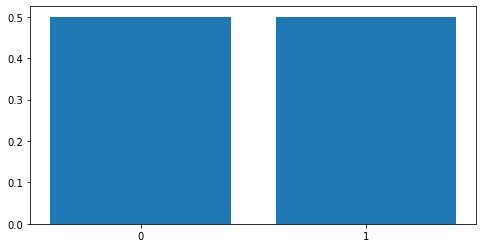

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
bar_positions = np.arange(len(empirical_distribution))
ax.bar(bar_positions, empirical_distribution)
plt.xticks(bar_positions, ('0', '1'))
plt.show()

Exercises for students: See how to implement multiple examples, get empirical distributions and compare with theoretical results

### Solutions to Problem 4 
### 1a.

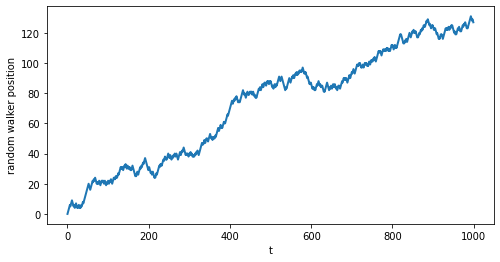

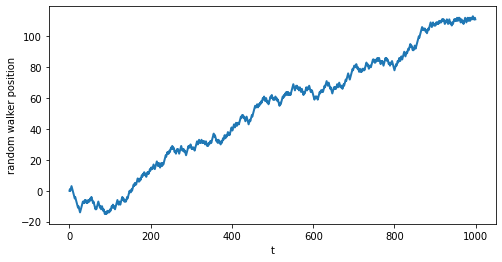

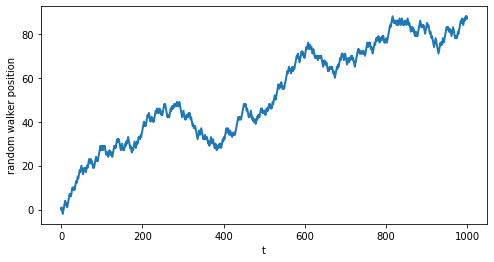

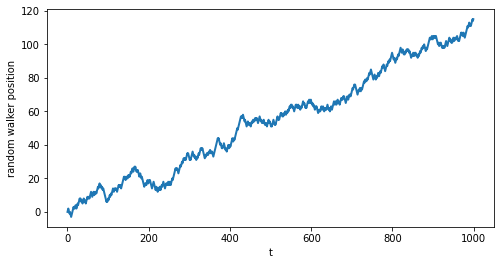

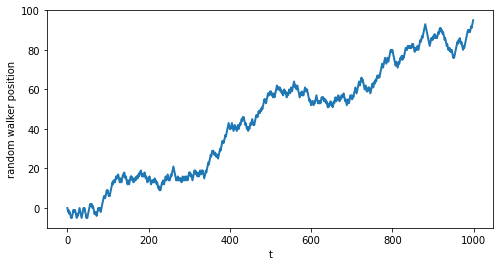

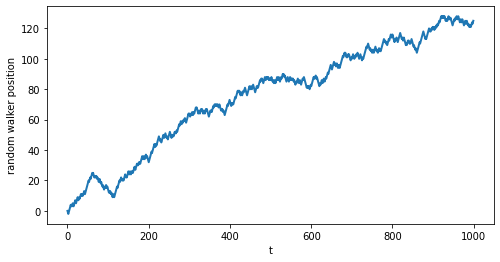

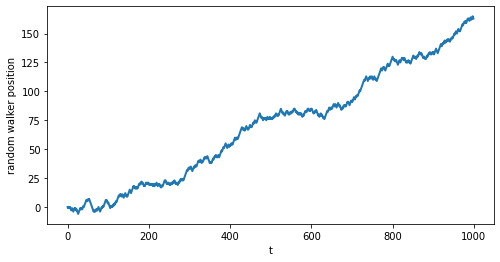

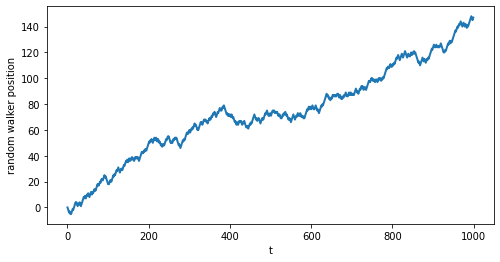

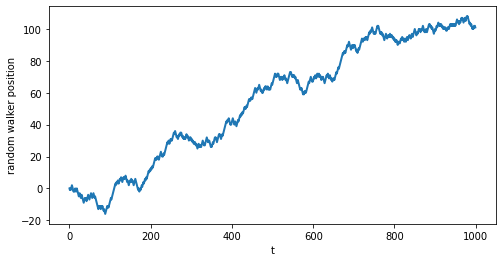

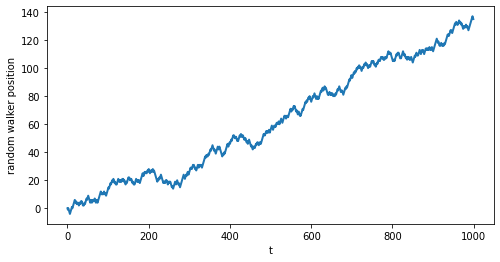

In [85]:
# Initialization of each realization
nsteps = 1000                  # number of steps to simulate
nrealizations = 10             # number of realizations to simulate
x = np.zeros((nsteps, nrealizations)) # collects all attained states
x[0] = np.zeros(nrealizations) # initial state

# Simulation of each realization
for r in range(nrealizations):
    for t in range(nsteps - 1):
        if np.random.rand() <= 0.55:  # NOW: P[one unit up] = 0.55
            x[t + 1, r] = x[t, r] + 1 
        else:
            x[t + 1, r] = x[t, r] - 1
            
# Plotting each realization
for r in range(nrealizations):
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    ax.plot(x[:, r], lw=2)
    ax.set_xlabel("t")
    ax.set_ylabel("random walker position")
    plt.show()

### 1b.

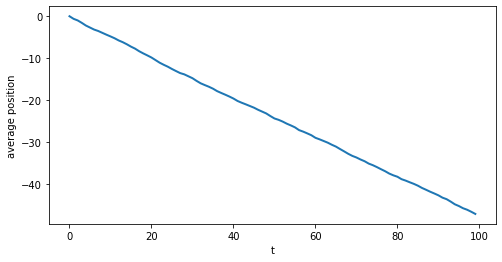

In [86]:
# Initialization each realization
nsteps = 100                  # number of steps to simulate
nrealizations = 100            # number of realizations to simulate
x = np.zeros((nsteps, nrealizations)) # collects all attained states
x[0] = np.zeros(nrealizations) # initial state

# Simulation of each realization
for r in range(nrealizations):
    for t in range(nsteps - 1):
        if np.random.rand() <= 0.25:  # NOW: P[one unit up] = 0.25
            x[t + 1, r] = x[t, r] + 1 
        else:
            x[t + 1, r] = x[t, r] - 1

# Computing the average positions
av_positions = np.zeros(nsteps)
for t in range(nsteps):
    for r in range(nrealizations):
        av_positions[t] += x[t, r]

av_positions /= nrealizations

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(av_positions, lw=2)
ax.set_xlabel("t")
ax.set_ylabel("average position")
plt.show()

Since with high probability (here 1 - p = 0.75) the random walker is moving one unit down each time step after initialization, its average position decreases linearly (because p is time independet) over time.

### 2.

[0.38 0.34 0.28]


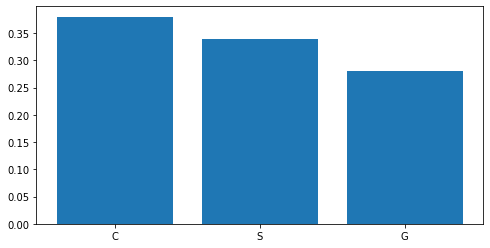

In [87]:
# How is Gary feeling on average during 10 days? Let us compute:
# Let -1 denote C, 0 denote S and 1 denote G.
empirical_distribution = get_empirical_dist(states=["-1", "0", "1"], 
                         transition_matrix=[[0.5, 0.4, 0.1], 
                                            [0.3,  0.4, 0.3], 
                                            [0.2, 0.3, 0.5]], 
                         initial_state="-1", # of course
                         nrealizations=100, 
                         N=10)

print(empirical_distribution)

# Plotting the histogram
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
bar_positions = np.arange(len(empirical_distribution))
ax.bar(bar_positions, empirical_distribution)
plt.xticks(bar_positions, ("C", "S", "G"))
plt.show()

### 3. <br />
The transition diagram for $(Z_n)_{n \geq 0}$ is

![title](pics/transition_diag.png)

In [88]:
# Initialization
nsteps = 100
nrealizations = 1000
states = ["-1", "0", "1"]
initial_state = "0"
transition_matrix = [[0.5, 0.5, 0.], 
                     [0.25,  0.5, 0.25], 
                     [0., 1., 0.]]

# Simulation of the realizations
chain = MarkovChain(transition_matrix=transition_matrix, states=states)
arr = np.zeros(((nsteps+1), nrealizations))
    
for r in range(nrealizations):
    simulation = chain.generate_states(current_state=initial_state, no=(nsteps+1))
    arr[:, r] = np.array(simulation)

# Count the occurence of Z_3 = 0 when Z_2^2 = 1 (count1)
# Count the occurence of Z_3 = 0 when Z_2^2 = 1 and Z_1 = 0 (count10)
count1 = 0
count10 = 0
n1 = 0  # # of realiz. where arr[2] == -1 or arr[2] == 1
n10 = 0 # # of realiz. where (arr[2] == -1 or arr[2] == 1) and arr[1] == 0

for r in range(nrealizations):
    if arr[2, r] == -1 or arr[2, r] == 1:
        n1 += 1
        if arr[3, r] == 0:
            count1 += 1
        
        if arr[1, r] == 0:
            n10 += 1
            if arr[3, r] == 0:
                count10 += 1
prob1 = count1 / n1
prob10 = count10 / n10

print("P(Z_3^2 = 0 | Z_1^2 = 1) = ", prob1)
print("P(Z_3^2 = 0 | Z_1^2 = 1 and Z_0^2 = 0) = ", prob10)

P(Z_3^2 = 0 | Z_1^2 = 1) =  0.6789838337182448
P(Z_3^2 = 0 | Z_1^2 = 1 and Z_0^2 = 0) =  0.7568493150684932


Since the above empirical probabilities are not converging to the same limit probability, $(Z_n^2)_{n\geq 0}$ is not a Markov chain: $Z_3$ does not only depend on $Z_2$.